## House Renting Prediction

## Importando as bibliotecas 

In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

px.set_mapbox_access_token(open("mapbox_token").read())

## Importando o dataset

In [21]:
df_data = pd.read_csv("sao-paulo-properties-april-2019.csv")

## EDA

In [9]:
df_data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [10]:
df_rent = df_data[df_data["Negotiation Type"]=="rent"]

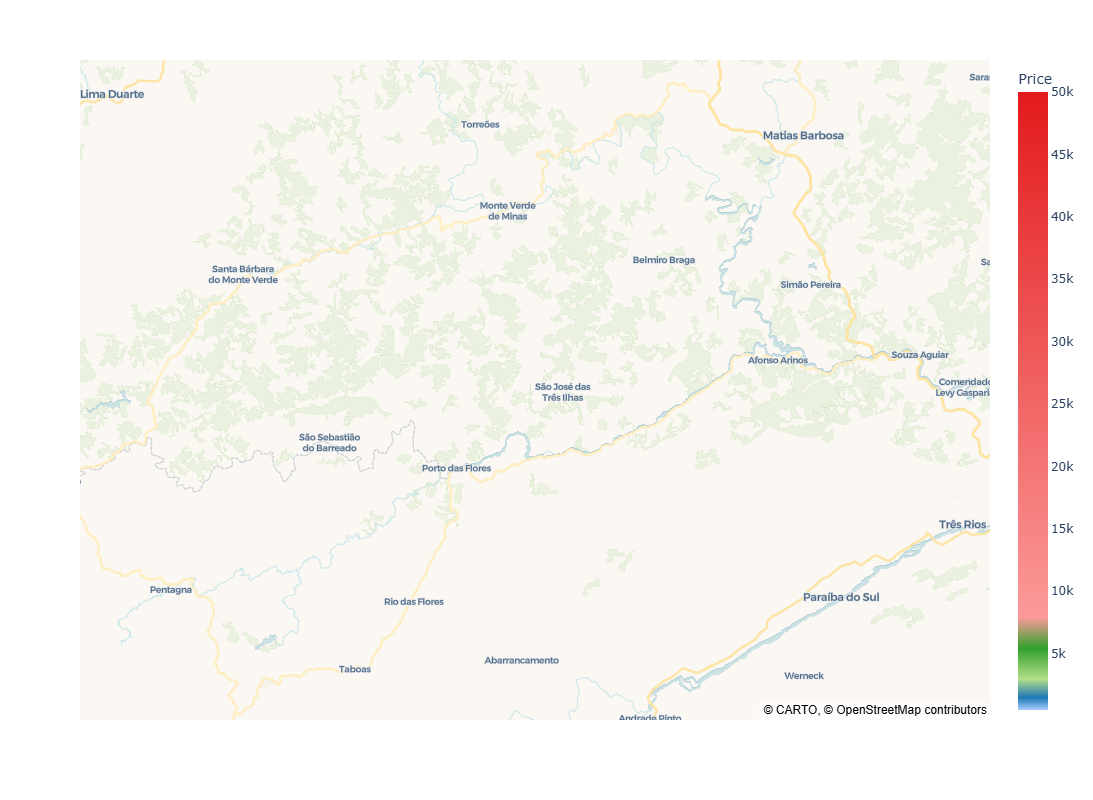

In [11]:
fig = px.scatter_map(df_rent, lat="Latitude", lon="Longitude", color="Price", size="Size",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, opacity=0.4)

fig.update_coloraxes(colorscale = [[0, 'rgb(166,206,277, 0.5)'],
                                   [0.02, 'rgb(31,120,180,0.5)'],
                                   [0.05, 'rgb(178,223,138,0.5)'],
                                   [0.10, 'rgb(51,160,44,0.5)'],
                                   [0.15, 'rgb(251,154,153,0.5)'],
                                   [1, 'rgb(227,26,28,0.5)'],
                                  ],
                    )

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.54138, lon=-46.69486)))
fig.show()

In [12]:
df_rent.shape

(7228, 16)

In [13]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [14]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

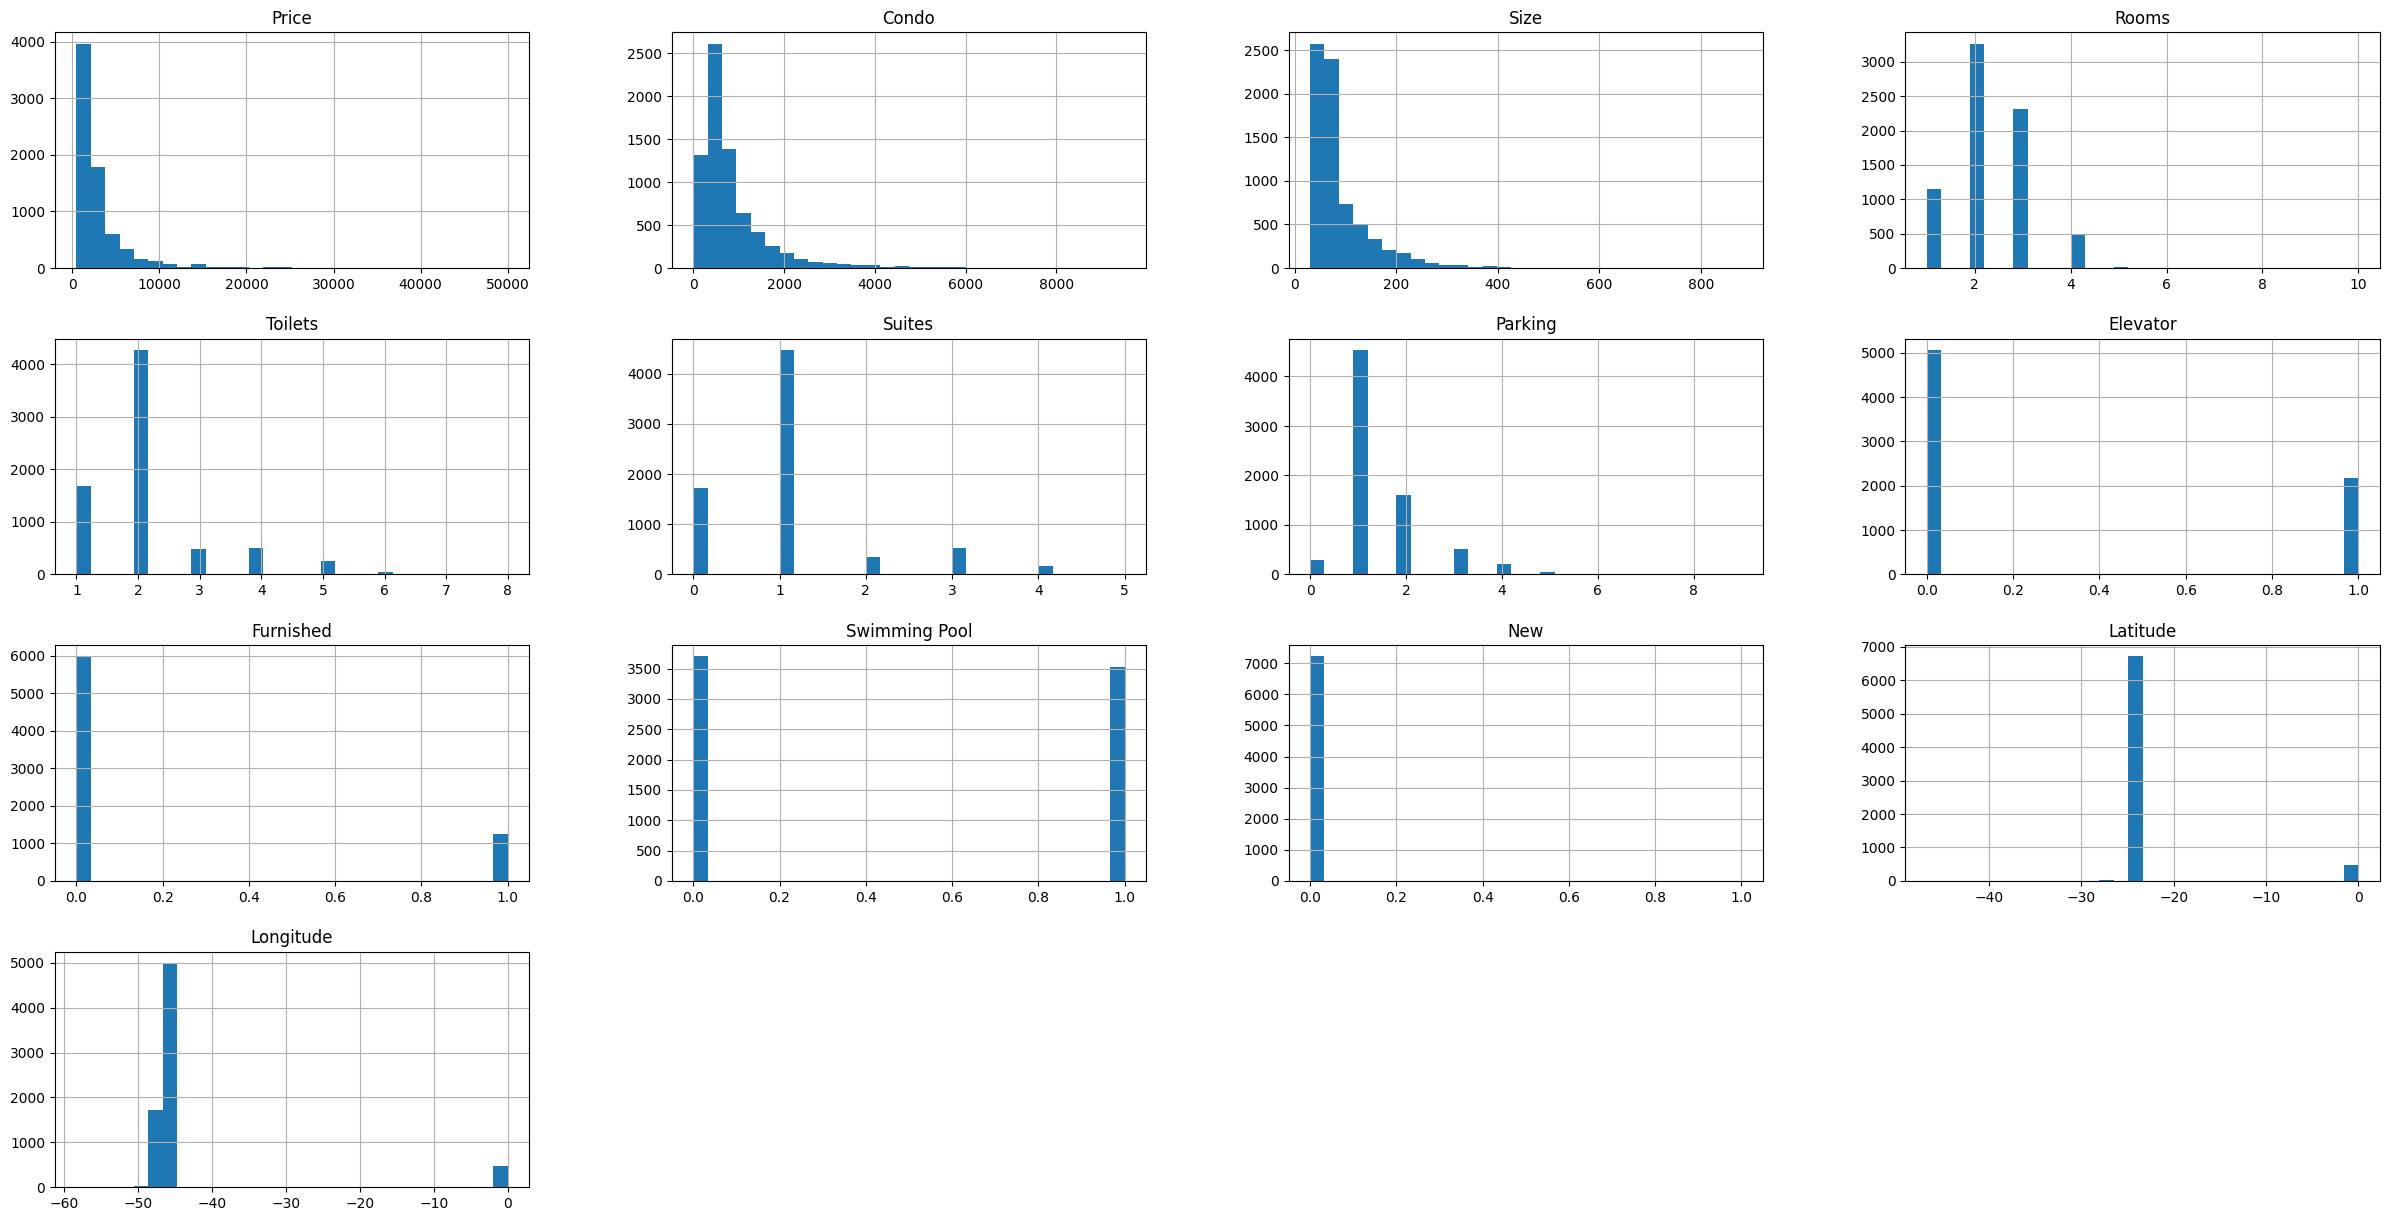

In [15]:
df_rent.hist(bins=30, figsize=(30,15))

In [16]:
df_rent["Property Type"].value_counts()

Property Type
apartment    7228
Name: count, dtype: int64

In [17]:
df_rent["District"].value_counts()

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Cambuci/São Paulo            153
                            ... 
Lajeado/São Paulo              8
Parque do Carmo/São Paulo      6
Guaianazes/São Paulo           6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [18]:
df_rent_numeric = df_rent.select_dtypes(include=["number"])

In [19]:
df_rent_numeric.corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

## Preprocessamentos dos dados

In [25]:
df_cleaned = df_rent.drop(["New", "Property Type", "Negotiation Type"], axis=1)

In [26]:
df_cleaned

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


## Tratamento de Dados Categóricos

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(df_rent[["District"]])

In [31]:
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]], shape=(7228, 1))

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[["District"]])
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7228 stored elements and shape (7228, 94)>

In [33]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(7228, 94))

In [37]:
one_hot = pd.get_dummies(df_cleaned["District"])

df = df_cleaned.drop('District', axis=1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
11206,21000,3000,208,4,4,3,3,1,1,1,...,False,False,False,False,False,False,False,False,False,False
11207,3800,710,55,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
11208,5000,2354,205,3,2,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False


## Treinamento de Modelos

In [38]:
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
11206,21000,3000,208,4,4,3,3,1,1,1,...,False,False,False,False,False,False,False,False,False,False
11207,3800,710,55,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
11208,5000,2354,205,3,2,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [39]:
from sklearn.model_selection import train_test_split


In [40]:
Y = df["Price"]
X = df.loc[:, df.columns != "Price"]

In [44]:
X

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,...,False,False,False,False,False,False,False,False,False,False
1,148,45,2,2,1,1,0,0,0,-23.550239,...,False,False,False,False,False,False,False,False,False,False
2,100,48,2,2,1,1,0,0,0,-23.542818,...,False,False,False,False,False,False,False,False,False,False
3,200,48,2,2,1,1,0,0,0,-23.547171,...,False,False,False,False,False,False,False,False,False,False
4,410,55,2,2,1,1,1,0,0,-23.525025,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,595,73,1,2,1,1,0,0,1,-23.617682,...,False,False,False,False,False,False,False,False,False,False
11206,3000,208,4,4,3,3,1,1,1,-23.606891,...,False,False,False,False,False,False,False,False,False,False
11207,710,55,1,1,0,1,0,1,1,0.000000,...,False,False,False,False,False,False,False,False,False,False
11208,2354,205,3,2,1,2,1,0,0,-23.612287,...,False,False,False,False,False,False,False,False,False,False


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [46]:
y_train

500        900
5359      1600
9146      1700
1555      2300
3742      3500
         ...  
252        900
10654    13500
1512     14000
2520      1300
10087     2000
Name: Price, Length: 5059, dtype: int64

In [47]:
x_train

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
500,0,48,2,2,1,1,0,0,0,-23.506624,...,False,False,False,False,False,False,False,False,False,False
5359,768,51,2,2,1,2,0,0,0,-23.561322,...,False,False,False,False,False,False,False,False,False,False
9146,415,64,3,2,1,1,1,1,0,-23.536768,...,False,False,False,False,False,False,False,False,False,False
1555,770,82,3,2,1,2,1,0,1,-23.597235,...,False,False,False,False,False,False,False,False,True,False
3742,1325,157,3,2,1,1,0,0,0,-23.571976,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,365,58,2,2,1,1,1,0,0,-23.550551,...,False,False,False,False,False,False,False,False,False,False
10654,3399,243,3,4,3,3,0,0,1,-23.570258,...,False,False,False,False,False,False,False,False,False,False
1512,5000,290,4,6,4,4,1,0,1,-23.581096,...,False,False,False,False,True,False,False,False,False,False
2520,504,61,1,1,0,0,0,0,0,-23.544987,...,False,False,False,False,False,False,False,False,False,False


## LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
alguns_dados = x_train.iloc[:5]
algumas_label = y_train.iloc[:5]

print("Predições:", lin_reg.predict(alguns_dados))
print("Labels:", algumas_label.values)

Predições: [1022.874588   1550.69885545 1978.47489286 1887.15403924 5702.77567118]
Labels: [ 900 1600 1700 2300 3500]


In [55]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(2025.675922522786)

## Decision Tree Regressor

In [57]:

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [65]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(lin_mse)
tree_rmse

np.float64(33.6342219797942)

## Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2291.16323531 2697.56920955 2818.44927201 2060.55328346 3180.05746803
 2760.18698305 2888.83370821 1898.49104957 3078.81890404 1797.9222348 ]
Mean: 2547.2045348040274
Standard deviation: 471.80628116103


In [66]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [2148.06566074 2330.57256412 2011.23494633 2036.24450327 2426.00161046
 2228.67165384 1772.00821347 2177.22837482 1988.61327616 1531.72431121]
Mean: 2065.0365114420683
Standard deviation: 250.38252674925195


## RandomForest Regressors

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

np.float64(698.9795175474565)

In [69]:
scores = cross_val_score(rf_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [1844.99059856 2131.45234776 1661.3229918  1637.94477473 2473.21230887
 1953.32473897 1767.16071708 1379.97879293 2357.66744109 1257.92737886]
Mean: 1846.4982090643105
Standard deviation: 373.4718744011328


## Avaliando e otimizando o modelo

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,30


In [73]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [74]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

1576.860374992455


## Visualizando a precisão do modelo

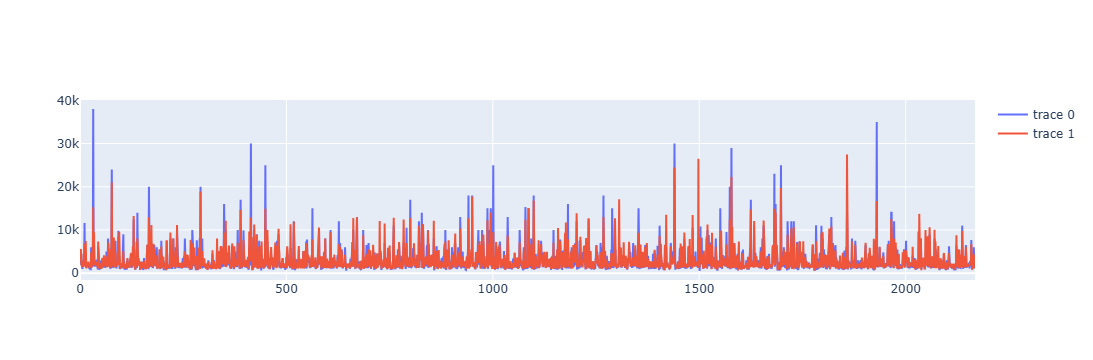

In [77]:
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                      go.Scatter(y=final_model_predictions)])

fig.show()